In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import datetime, time
import numpy as np
import statsmodels.api as sm
from sets import Set
from dateutil.parser import *
from sklearn.model_selection import KFold


## Load tweets

In [30]:
f = open('tweet_data/reduced_#nfl')

# Make sure to go back to file head
f_start = f.tell()
f.seek(f_start)

tweet_nfl = []

for line in f.readlines():
    tweet = json.loads(line)
    tweet_nfl.append(tweet)
print len(tweet_nfl)
print tweet_nfl[0]

259024
{u'firstpost_date': 1419999683, u'author': 2928895689, u'user_allposts': 5, u'mention': 0, u'followers': 33, u'urls': 0, u'user_create': u'Thu Dec 18 03:45:13 +0000 2014', u'retweet': 1}


In [31]:
f = open('tweet_data/reduced_#superbowl')

# Make sure to go back to file head
f_start = f.tell()
f.seek(f_start)

tweet_superbowl = []

for line in f.readlines():
    tweet = json.loads(line)
    tweet_superbowl.append(tweet)
print len(tweet_superbowl)
print tweet_superbowl[0]

1348767
{u'firstpost_date': 1419866833, u'author': 2374402878, u'user_allposts': 552, u'mention': 0, u'followers': 294, u'urls': 0, u'user_create': u'Wed Mar 05 22:06:15 +0000 2014', u'retweet': 1}


In [44]:
# load #sb49
f = open('tweet_data/reduced_#sb49')
f_start = f.tell()
f.seek(f_start)
tweet_sb49 = []

for line in f.readlines():
    tweet = json.loads(line)
    tweet_sb49.append(tweet)
print len(tweet_sb49)

# load #patriots
f = open('tweet_data/reduced_#patriots')
f_start = f.tell()
f.seek(f_start)
tweet_patriots = []

for line in f.readlines():
    tweet = json.loads(line)
    tweet_patriots.append(tweet)
print len(tweet_patriots)

# load #gopatriots
f = open('tweet_data/reduced_#gopatriots')
f_start = f.tell()
f.seek(f_start)
tweet_gopatriots = []

for line in f.readlines():
    tweet = json.loads(line)
    tweet_gopatriots.append(tweet)
print len(tweet_gopatriots)

# load #gohawks
f = open('tweet_data/reduced_#gohawks')
f_start = f.tell()
f.seek(f_start)
tweet_gohawks = []

for line in f.readlines():
    tweet = json.loads(line)
    tweet_gohawks.append(tweet)
print len(tweet_gohawks)

826951
489713
26232
188136


## Calculate Statistics

In [176]:
def avg_no_of_tweets_hour(tweets):
    num_of_retweets = []
    num_of_followers = []
    mintime = tweets[0]['firstpost_date']
    maxtime = tweets[-1]['firstpost_date']
    num_hours = int((maxtime-mintime)/3600)
    num_tweets_in_hour = [0]*num_hours
    num_tweets = len(tweets)
    for i in range(0,num_tweets):
        tweet = tweets[i]
        
        num_of_retweets.append(tweet['retweet'])
        num_of_followers.append(tweet['followers'])
        
        tweet_time = tweet['firstpost_date']
        if tweet_time >= mintime:
            hour = int((tweet_time-mintime)/3600)
            if hour >= num_hours:
                break;
            num_tweets_in_hour[hour] += 1
    return num_tweets_in_hour,num_of_followers,num_of_retweets

In [186]:
num_tweets_in_hour,num_of_followers,num_of_retweets = avg_no_of_tweets_hour(tweet_gopatriots)
print "gopatriots"
print np.mean(np.array(num_tweets_in_hour))
print np.mean(np.array(num_of_followers))
print np.mean(np.array(num_of_retweets))

num_tweets_in_hour,num_of_followers,num_of_retweets = avg_no_of_tweets_hour(tweet_gohawks)
print "gohawks"
print np.mean(np.array(num_tweets_in_hour))
print np.mean(np.array(num_of_followers))
print np.mean(np.array(num_of_retweets))

num_tweets_in_hour,num_of_followers,num_of_retweets = avg_no_of_tweets_hour(tweet_patriots)
print "patriots"
print np.mean(np.array(num_tweets_in_hour))
print np.mean(np.array(num_of_followers))
print np.mean(np.array(num_of_retweets))

num_tweets_in_hour,num_of_followers,num_of_retweets = avg_no_of_tweets_hour(tweet_sb49)
print "sb49"
print np.mean(np.array(num_tweets_in_hour))
print np.mean(np.array(num_of_followers))
print np.mean(np.array(num_of_retweets))

num_tweets_in_hour,num_of_followers,num_of_retweets = avg_no_of_tweets_hour(tweet_nfl)
print "nfl"
print np.mean(np.array(num_tweets_in_hour))
print np.mean(np.array(num_of_followers))
print np.mean(np.array(num_of_retweets))

num_tweets_in_hour,num_of_followers,num_of_retweets = avg_no_of_tweets_hour(tweet_superbowl)
print "superbowl"
print np.mean(np.array(num_tweets_in_hour))
print np.mean(np.array(num_of_followers))
print np.mean(np.array(num_of_retweets))

gopatriots
38.4055636896
1602.00987344
0.0240164684355
gohawks
193.554526749
2393.58231279
0.0473912488838
patriots
499.706122449
3641.68836645
0.0510870652811
sb49
1420.85051546
10230.2115605
0.183835266574
nfl
279.719222462
4763.38063323
0.0246929785616
superbowl
1402.04054054
9958.05477978
0.120150004004


### Plot "number of tweets in hour" over time for #NFL & #SuperBowl

In [5]:
mintime = tweet_nfl[0]['firstpost_date']
maxtime = tweet_nfl[-1]['firstpost_date']
num_hours = int((maxtime-mintime)/3600)
num_tweets_in_hour = [0]*num_hours

for i in range(0,len(tweet_nfl)):
    tweet = tweet_nfl[i]
    tweet_time = tweet['firstpost_date']
    if tweet_time >= mintime:
        hour = int((tweet_time-mintime)/3600)
        if hour >= num_hours:
            break;
        num_tweets_in_hour[hour] += 1
print len(num_tweets_in_hour)

926


In [18]:
mintime = tweet_superbowl[0]['firstpost_date']
maxtime = tweet_superbowl[-1]['firstpost_date']
num_hours = int((maxtime-mintime)/3600)
num_tweets_in_hour_spb = [0]*num_hours

for i in range(0,len(tweet_superbowl)):
    tweet = tweet_superbowl[i]
    tweet_time = tweet['firstpost_date']
    if tweet_time >= mintime:
        hour = int((tweet_time-mintime)/3600)
        if hour >= num_hours:
            break;
        num_tweets_in_hour_spb[hour] += 1
print len(num_tweets_in_hour_spb)

962


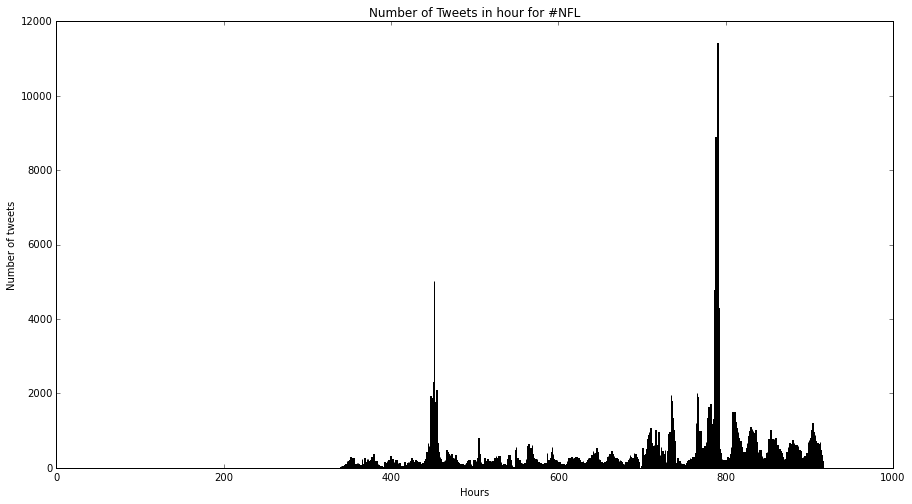

In [16]:
plt.figure(figsize=(15, 8))
plt.bar(range(len(num_tweets_in_hour)), num_tweets_in_hour)
plt.title("Number of Tweets in hour for #NFL")
plt.ylabel("Number of tweets")
plt.xlabel("Hours")

plt.show()

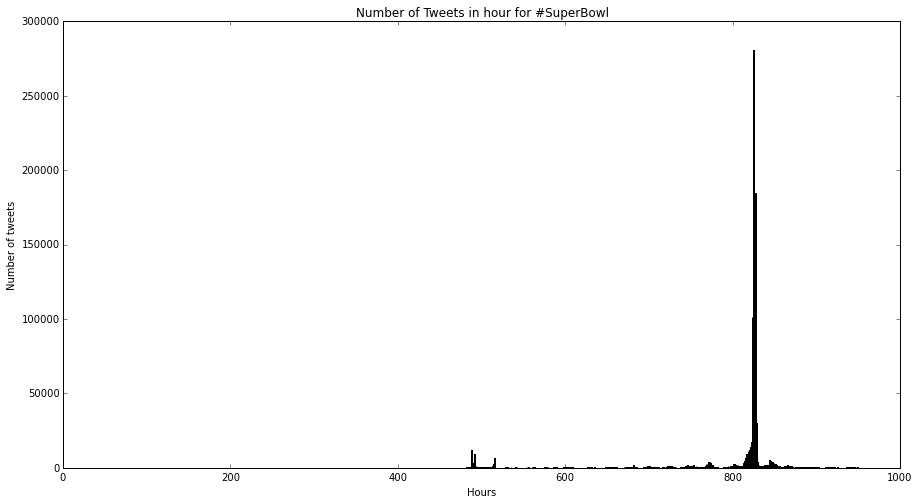

In [19]:
plt.figure(figsize=(15, 8))
plt.bar(range(len(num_tweets_in_hour_spb)), num_tweets_in_hour_spb)
plt.title("Number of Tweets in hour for #SuperBowl")
plt.ylabel("Number of tweets")
plt.xlabel("Hours")

plt.show()

## Extract Features

In [191]:
def extract_features(mintime,maxtime,tweets):
    date_reference = datetime.datetime(2015,01,01, 0,0,0)
    time_reference = int(time.mktime(date_reference.timetuple()))
    
    num_hours = int((maxtime-mintime)/3600)
    num_tweets_in_hour = [0]*num_hours			# number of tweets in the hour
    num_retweets_in_hour = [0]*num_hours		# number of retweets in the hour
    sum_followers = [0]*num_hours				# sum of the number of followers of users posting tweets in the hour
    max_followers = [0]*num_hours				# max number of followers for the users posting tweets in the hour

    num_authors_in_hour = [0]*num_hours
    sum_mentions = [0]*num_hours # sum of the number of mentions in tweets in the hour
    sum_urls = [0]*num_hours # ratio of tweets with url
    active_users = [0]*num_hours # average number of tweets posted by a user per day, the smaller the more active

    time_of_day = [0]*num_hours
    mintime_daytime = int((mintime-time_reference)/3600) % 24
    for t in range(0,num_hours):
        time_of_day[t] = mintime_daytime + t
    
    author_set = Set([])
    prev_hour = -1
    for i in range(0,len(tweets)):
        tweet = tweets[i]
        tweet_time = tweet['firstpost_date']
        if tweet_time >= mintime:
            hour = int((tweet_time-mintime)/3600)
            if hour >= num_hours:
                break;
            if hour > prev_hour: 
                if prev_hour == -1: # set first hour
                    prev_hour = hour
                else: # next hour
                    num_authors_in_hour[prev_hour] = len(author_set)
                    author_set = Set([])
                    prev_hour = hour

            num_tweets_in_hour[hour] += 1
            try:
                num_retweets_in_hour[hour] += tweet['retweet']
            except:
                pass
            sum_followers[hour] += tweet['followers']
            max_followers[hour] = max(max_followers[hour], tweet['followers'])

            author_set.add(tweet['author'])
            sum_mentions[hour] += tweet['mention']
            sum_urls[hour] += tweet['urls']

            t1 = int(time.mktime(parse(tweet['user_create']).timetuple()))
            if ((tweet_time - t1)/(3600*24)) / float(1+tweet['user_allposts']) < 1: # very active
                active_users[hour] += 1

    num_tweets_in_hour_1 = [x+1 for x in num_tweets_in_hour]
    url_ratios = np.array(sum_urls, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    author_ratios = np.array(num_authors_in_hour, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    mention_ratios = np.array(sum_mentions, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    
    y = num_tweets_in_hour[1:]
    x_5 = [num_tweets_in_hour[0:-1] , num_retweets_in_hour[0:-1] , sum_followers[0:-1] , max_followers[0:-1] , time_of_day[0:-1]]
    x_all = [num_tweets_in_hour[0:-1], num_retweets_in_hour[0:-1], sum_followers[0:-1], max_followers[0:-1], time_of_day[0:-1],
        num_authors_in_hour[0:-1], sum_mentions[0:-1], url_ratios[0:-1], active_users[0:-1],
         author_ratios[0:-1], mention_ratios[0:-1],
        ]

#     ones = np.ones(len(x_5[0]))
#     X_5 = sm.add_constant(np.column_stack((x_5[0], ones)))
#     X_all = sm.add_constant(np.column_stack((x_all[0], ones)))
#     for ele in x_5[1:]:
#         X_5 = sm.add_constant(np.column_stack((ele, X_5)))
#     for ele in x_all[1:]:
#         X_all = sm.add_constant(np.column_stack((ele, X_all)))
    
#     return x_5,x_all, y
    return x_all, y

## Fit Models

In [58]:
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.regression.linear_model.OLS(y, X).fit()
    return results

### #NFL

In [59]:
start_date = datetime.datetime(2015,01,30, 4,0,0)
end_date = datetime.datetime(2015,02,03, 0,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = int(time.mktime(end_date.timetuple()))

print ("extracting features")
X_nfl_5, X_nfl_all, y_nfl = extract_features(mintime,maxtime,tweet_nfl)
print len(X_nfl_5)
print len(X_nfl_all)

extracting features
5
11


In [60]:
model_nfl_5 = reg_m(y_nfl,X_nfl_5)
print model_nfl_5.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     19.98
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           4.04e-13
Time:                        03:35:54   Log-Likelihood:                -782.33
No. Observations:                  91   AIC:                             1577.
Df Residuals:                      85   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.4695      5.563      0.803      0.4

In [61]:
model_nfl_all = reg_m(y_nfl,X_nfl_all)
print model_nfl_all.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     19.68
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           2.37e-18
Time:                        03:36:21   Log-Likelihood:                -757.66
No. Observations:                  91   AIC:                             1539.
Df Residuals:                      79   BIC:                             1569.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1         -3459.5773   1991.417     -1.737      0.0

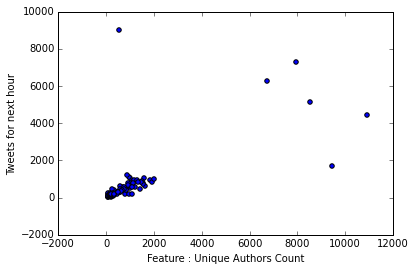

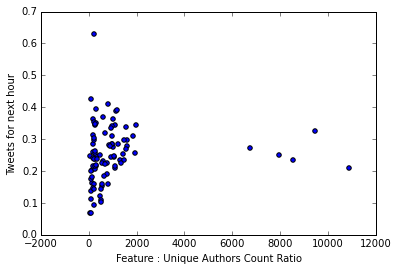

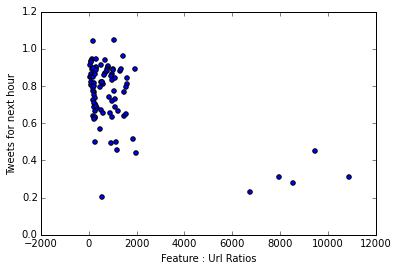

In [226]:
# plot best three features
plt.gca().scatter(y_nfl,X_nfl_all[5])
plt.xlabel('Feature : Unique Authors Count')
plt.ylabel('Tweets for next hour')
plt.show()

plt.gca().scatter(y_nfl,X_nfl_all[10])
plt.xlabel('Feature : Unique Authors Count Ratio')
plt.ylabel('Tweets for next hour')
plt.show()

plt.gca().scatter(y_nfl,X_nfl_all[7])
plt.xlabel('Feature : Url Ratios')
plt.ylabel('Tweets for next hour')
plt.show()

### #SuperBowl

In [67]:
start_date = datetime.datetime(2015,01,30, 4,0,0)
end_date = datetime.datetime(2015,02,03, 0,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = int(time.mktime(end_date.timetuple()))

print ("extracting features")
X_superbowl_5, X_superbowl_all, y_superbowl = extract_features(mintime,maxtime,tweet_superbowl)
print len(X_superbowl_5)
print len(X_superbowl_all)

extracting features
5
11


In [70]:
model = reg_m(y_superbowl, X_superbowl_5)
print model.summary()

model = reg_m(y_superbowl, X_superbowl_all)
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     74.67
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           1.28e-29
Time:                        03:52:11   Log-Likelihood:                -1025.4
No. Observations:                  91   AIC:                             2063.
Df Residuals:                      85   BIC:                             2078.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            10.1934     79.305      0.129      0.8

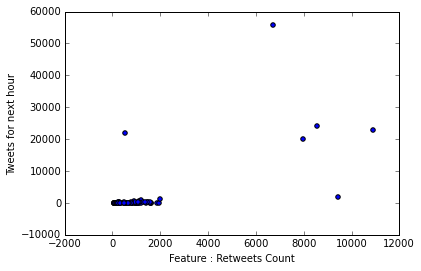

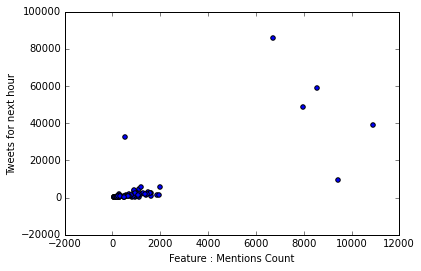

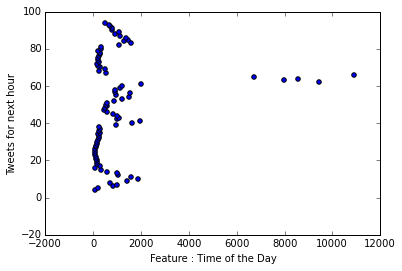

In [230]:
# plot best three features
plt.gca().scatter(y_nfl,X_superbowl_all[1])
plt.xlabel('Feature : Retweets Count')
plt.ylabel('Tweets for next hour')
plt.show()

plt.gca().scatter(y_nfl,X_superbowl_all[6])
plt.xlabel('Feature : Mentions Count')
plt.ylabel('Tweets for next hour')
plt.show()

plt.gca().scatter(y_nfl,X_superbowl_all[4])
plt.xlabel('Feature : Time of the Day')
plt.ylabel('Tweets for next hour')
plt.show()

### #Patriots

In [45]:
start_date = datetime.datetime(2015,01,30, 4,0,0)
end_date = datetime.datetime(2015,02,03, 0,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = int(time.mktime(end_date.timetuple()))

print ("extracting features")
X_5, X_all, y = extract_features(mintime,maxtime,tweet_patriots)

model = sm.regression.linear_model.OLS(y, X_5).fit()
print model.summary()

model = sm.regression.linear_model.OLS(y, X_all).fit()
print model.summary()

extracting features
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     42.21
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           1.24e-21
Time:                        03:12:04   Log-Likelihood:                -915.10
No. Observations:                  91   AIC:                             1842.
Df Residuals:                      85   BIC:                             1857.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            12.8537     24.113

### #SB49

In [46]:
start_date = datetime.datetime(2015,01,30, 4,0,0)
end_date = datetime.datetime(2015,02,03, 0,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = int(time.mktime(end_date.timetuple()))

print ("extracting features")
X_5, X_all, y = extract_features(mintime,maxtime,tweet_sb49)

model = sm.regression.linear_model.OLS(y, X_5).fit()
print model.summary()

model = sm.regression.linear_model.OLS(y, X_all).fit()
print model.summary()

extracting features
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     63.09
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           3.79e-27
Time:                        03:17:45   Log-Likelihood:                -977.66
No. Observations:                  91   AIC:                             1967.
Df Residuals:                      85   BIC:                             1982.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.7311     47.392

### #GoPatriots

In [47]:
start_date = datetime.datetime(2015,01,30, 4,0,0)
end_date = datetime.datetime(2015,02,03, 0,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = int(time.mktime(end_date.timetuple()))

print ("extracting features")
X_5, X_all, y = extract_features(mintime,maxtime,tweet_gopatriots)

model = sm.regression.linear_model.OLS(y, X_5).fit()
print model.summary()

model = sm.regression.linear_model.OLS(y, X_all).fit()
print model.summary()

extracting features
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           1.01e-19
Time:                        03:22:57   Log-Likelihood:                -676.89
No. Observations:                  91   AIC:                             1366.
Df Residuals:                      85   BIC:                             1381.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2053      1.727

#### draw plots for the rest

In [228]:
start_date = datetime.datetime(2015,01,30, 4,0,0)
end_date = datetime.datetime(2015,02,03, 0,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = int(time.mktime(end_date.timetuple()))

X_all, y = extract_features(mintime,maxtime,tweet_nfl)

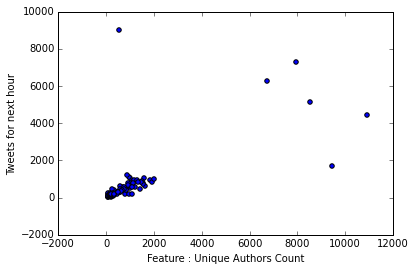

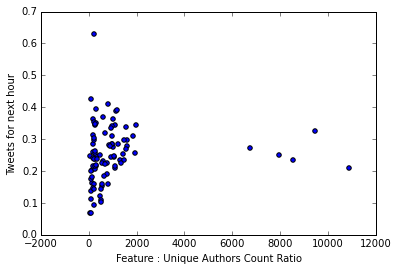

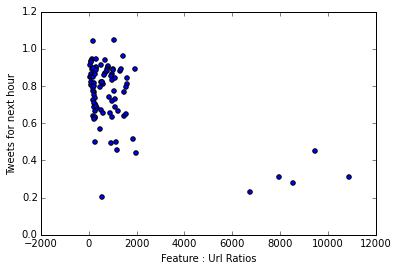

In [229]:
plt.gca().scatter(y,X_all[5])
plt.xlabel('Feature : Unique Authors Count')
plt.ylabel('Tweets for next hour')
plt.show()

plt.gca().scatter(y,X_all[10])
plt.xlabel('Feature : Unique Authors Count Ratio')
plt.ylabel('Tweets for next hour')
plt.show()

plt.gca().scatter(y,X_all[7])
plt.xlabel('Feature : Url Ratios')
plt.ylabel('Tweets for next hour')
plt.show()

## Cross Validation

In [187]:
def extract_features_cv(mintime,maxtime,tweets):
    date_reference = datetime.datetime(2015,01,01, 0,0,0)
    time_reference = int(time.mktime(date_reference.timetuple()))
    
    num_hours = int((maxtime-mintime)/3600)
    num_tweets_in_hour = [0]*num_hours			# number of tweets in the hour
    num_retweets_in_hour = [0]*num_hours		# number of retweets in the hour
    sum_followers = [0]*num_hours				# sum of the number of followers of users posting tweets in the hour
    max_followers = [0]*num_hours				# max number of followers for the users posting tweets in the hour

    num_authors_in_hour = [0]*num_hours
    sum_mentions = [0]*num_hours # sum of the number of mentions in tweets in the hour
    sum_urls = [0]*num_hours # ratio of tweets with url
    active_users = [0]*num_hours # average number of tweets posted by a user per day, the smaller the more active

    time_of_day = [0]*num_hours
    mintime_daytime = int((mintime-time_reference)/3600) % 24
    for t in range(0,num_hours):
        time_of_day[t] = mintime_daytime + t
    
    author_set = Set([])
    prev_hour = -1
    for i in range(0,len(tweets)):
        tweet = tweets[i]
        tweet_time = tweet['firstpost_date']
        if tweet_time >= mintime:
            hour = int((tweet_time-mintime)/3600)
            if hour >= num_hours:
                break;
            if hour > prev_hour: 
                if prev_hour == -1: # set first hour
                    prev_hour = hour
                else: # next hour
                    num_authors_in_hour[prev_hour] = len(author_set)
                    author_set = Set([])
                    prev_hour = hour

            num_tweets_in_hour[hour] += 1
            try:
                num_retweets_in_hour[hour] += tweet['retweet']
            except:
                pass
            sum_followers[hour] += tweet['followers']
            max_followers[hour] = max(max_followers[hour], tweet['followers'])

            author_set.add(tweet['author'])
            sum_mentions[hour] += tweet['mention']
            sum_urls[hour] += tweet['urls']

            t1 = int(time.mktime(parse(tweet['user_create']).timetuple()))
            if ((tweet_time - t1)/(3600*24)) / float(1+tweet['user_allposts']) < 1: # very active
                active_users[hour] += 1

    num_tweets_in_hour_1 = [x+1 for x in num_tweets_in_hour]
    url_ratios = np.array(sum_urls, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    author_ratios = np.array(num_authors_in_hour, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    mention_ratios = np.array(sum_mentions, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    
    y = num_tweets_in_hour[1:]
    x_all = [num_tweets_in_hour[0:-1], num_retweets_in_hour[0:-1], sum_followers[0:-1], max_followers[0:-1], time_of_day[0:-1],
        num_authors_in_hour[0:-1], sum_mentions[0:-1], url_ratios[0:-1], active_users[0:-1],
         author_ratios[0:-1], mention_ratios[0:-1],
        ]

    ones = np.ones(len(x_all[0]))
    X_all = sm.add_constant(np.column_stack((x_all[0], ones)))
    for ele in x_all[1:]:
        X_all = sm.add_constant(np.column_stack((ele, X_all)))
    
    return X_all, y

### CV ALL

In [93]:
def cv_all(tweets):
    start_date = datetime.datetime(2015,01,30, 4,0,0)
    end_date = datetime.datetime(2015,02,03, 0,0,0)
    mintime = int(time.mktime(start_date.timetuple()))
    maxtime = int(time.mktime(end_date.timetuple()))
    X, y = extract_features_cv(mintime,maxtime,tweets)

    # cross validation
    cv_error = []
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]

        model = sm.regression.linear_model.OLS(y_train, X_train).fit()
        params = model.params

        predict = np.dot(X_test,params)
        error = np.mean(np.abs(predict - y_test))
        cv_error.append(error)
    return np.mean(cv_error)

In [95]:
print "gopatriots"
print cv_all(tweet_gopatriots)
print "gohawks"
print cv_all(tweet_gohawks)
print "patriots"
print cv_all(tweet_patriots)

gopatriots
242.0089004
gohawks
1024.29925917
patriots
12252.2954763


In [96]:
print "sb49"
print cv_all(tweet_sb49)
print "nfl"
print cv_all(tweet_nfl)
print "superbowl"
print cv_all(tweet_superbowl)

sb49
31143.1341096
nfl
909.18465763
superbowl
18498.1396723


### Split Data - NFL

In [77]:
time1 = 1422806400 #20150201 8:00am
time2 = 1422849600 #20150201 8:00pm

tweet_nfl_1 = []
tweet_nfl_2 = []
tweet_nfl_3 = []
for i in range(0,len(tweet_nfl)):
    tweet = tweet_nfl[i]
    tweet_time = tweet['firstpost_date']
    if tweet_time < time1: # first set
        tweet_nfl_1.append(tweet)
    elif tweet_time >= time1 and tweet_time < time2: # second set
        tweet_nfl_2.append(tweet)
    else: # third set
        tweet_nfl_3.append(tweet)
print len(tweet_nfl_1)
print len(tweet_nfl_2)
print len(tweet_nfl_3)

134549
52209
72266


In [82]:
start_date = datetime.datetime(2015,01,16, 20,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = 1422806400

X, y = extract_features_cv(mintime,maxtime,tweet_nfl_1)
print len(X)
print len(y)

371
371


In [86]:
print ("fitting the model w. CV")

# cross validation
cv_error = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
    model = sm.regression.linear_model.OLS(y_train, X_train).fit()
    params = model.params
    
    predict = np.dot(X_test,params)
    error = np.mean(np.abs(predict - y_test))
    cv_error.append(error)
print np.mean(cv_error)

fitting the model w. CV
144.088069287


In [88]:
mintime = 1422806400
maxtime = 1422849600

X_2, y_2 = extract_features_cv(mintime,maxtime,tweet_nfl_2)
print len(X_2)
print len(y_2)

# cross validation
cv_error = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_2):
    X_train, X_test = X_2[train_index], X_2[test_index]
    y_train, y_test = np.array(y_2)[train_index], np.array(y_2)[test_index]
    
    model = sm.regression.linear_model.OLS(y_train, X_train).fit()
    params = model.params
    
    predict = np.dot(X_test,params)
    error = np.mean(np.abs(predict - y_test))
    cv_error.append(error)
print "#NFL period 2"
print np.mean(cv_error)

11
11
#NFL period 2
19897.8641416


In [89]:
cv_error

[1498.7136706639139,
 9459.6277245943638,
 1935.926369744604,
 4759.9372871713931,
 3967.4543350169552,
 22236.755096739333,
 34689.224762608297,
 37139.683757730876,
 21158.709847821694,
 62132.608563969843]

In [92]:
mintime = 1422849600
end_date = datetime.datetime(2015,02,03, 0,0,0)
maxtime = int(time.mktime(end_date.timetuple()))

X_3, y_3 = extract_features_cv(mintime,maxtime,tweet_nfl_3)
print len(X_3)
print len(y_3)

# cross validation
cv_error = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_3):
    X_train, X_test = X_3[train_index], X_3[test_index]
    y_train, y_test = np.array(y_3)[train_index], np.array(y_3)[test_index]
    
    model = sm.regression.linear_model.OLS(y_train, X_train).fit()
    params = model.params
    
    predict = np.dot(X_test,params)
    error = np.mean(np.abs(predict - y_test))
    cv_error.append(error)
print "#NFL period 3"
print np.mean(cv_error)

27
27
#NFL period 3
227.924025563


In [203]:
def cv3(tweets):
    # split tweets
    time1 = 1422806400 #20150201 8:00am
    time2 = 1422849600 #20150201 8:00pm

    tweet_1 = []
    tweet_2 = []
    tweet_3 = []
    for i in range(0,len(tweets)):
        tweet = tweets[i]
        tweet_time = tweet['firstpost_date']
        if tweet_time < time1: # first set
            tweet_1.append(tweet)
        elif tweet_time >= time1 and tweet_time < time2: # second set
            tweet_2.append(tweet)
        else: # third set
            tweet_3.append(tweet)
#     print("Finish Split")

    # Period 1
    start_date = datetime.datetime(2015,01,16, 20,0,0)
    mintime = int(time.mktime(start_date.timetuple()))
    maxtime = 1422806400

    X, y = extract_features_cv(mintime,maxtime,tweet_1)

    # cross validation
    cv_error = []
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]

        model = sm.regression.linear_model.OLS(y_train, X_train).fit()
        params = model.params

        predict = np.dot(X_test,params)
        error = np.mean(np.abs(predict - y_test))
        cv_error.append(error)
    print "period 1"
    print np.mean(cv_error)
    
    # Period 2
    mintime = 1422806400
    maxtime = 1422849600

    X_2, y_2 = extract_features_cv(mintime,maxtime,tweet_2)

    # cross validation
    cv_error = []
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(X_2):
        X_train, X_test = X_2[train_index], X_2[test_index]
        y_train, y_test = np.array(y_2)[train_index], np.array(y_2)[test_index]

        model = sm.regression.linear_model.OLS(y_train, X_train).fit()
        params = model.params

        predict = np.dot(X_test,params)
        error = np.mean(np.abs(predict - y_test))
        cv_error.append(error)
    print "period 2"
    print np.mean(cv_error)
    
    # Period 3
    mintime = 1422849600
    end_date = datetime.datetime(2015,02,03, 0,0,0)
    maxtime = int(time.mktime(end_date.timetuple()))

    X_3, y_3 = extract_features_cv(mintime,maxtime,tweet_3)

    # cross validation
    cv_error = []
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(X_3):
        X_train, X_test = X_3[train_index], X_3[test_index]
        y_train, y_test = np.array(y_3)[train_index], np.array(y_3)[test_index]

        model = sm.regression.linear_model.OLS(y_train, X_train).fit()
        params = model.params

        predict = np.dot(X_test,params)
        error = np.mean(np.abs(predict - y_test))
        cv_error.append(error)
    print "period 3"
    print np.mean(cv_error)

In [204]:
print "#GoPatriots"
cv3(tweet_gopatriots)
print "#GoHawks"
cv3(tweet_gohawks)
print "#Patriots"
cv3(tweet_patriots)
print "#SB49"
cv3(tweet_sb49)
print "#SuperBowl"
cv3(tweet_superbowl)

#GoPatriots
period 1
19.9742713123
period 2
580.1852386
period 3
13.1817044747
#GoHawks
period 1
360.631948326
period 2
6521.5199085
period 3
172.783272513
#Patriots
period 1
271.489182564
period 2
40915.4144855
period 3
359.411204809
#SB49
period 1
47.1728619683
period 2
367552.694034
period 3
533.426675642
#SuperBowl
period 1
417.181398684
period 2
126008.327985
period 3
1130.441074


## Testing

In [162]:
def extract_features_test(mintime,tweets):
    date_reference = datetime.datetime(2015,01,01, 0,0,0)
    time_reference = int(time.mktime(date_reference.timetuple()))
    
#     num_hours = int((maxtime-mintime)/3600)
    num_hours = 6
    num_tweets_in_hour = [0]*num_hours			# number of tweets in the hour
    num_retweets_in_hour = [0]*num_hours		# number of retweets in the hour
    sum_followers = [0]*num_hours				# sum of the number of followers of users posting tweets in the hour
    max_followers = [0]*num_hours				# max number of followers for the users posting tweets in the hour

    num_authors_in_hour = [0]*num_hours
    sum_mentions = [0]*num_hours # sum of the number of mentions in tweets in the hour
    sum_urls = [0]*num_hours # ratio of tweets with url
    active_users = [0]*num_hours # average number of tweets posted by a user per day, the smaller the more active

    time_of_day = [0]*num_hours
    mintime_daytime = int((mintime-time_reference)/3600) % 24
    for t in range(0,num_hours):
        time_of_day[t] = mintime_daytime + t
    
    author_set = Set([])
    prev_hour = -1
    for i in range(0,len(tweets)):
        tweet = tweets[i]
        tweet_time = tweet['firstpost_date']
        if tweet_time >= mintime:
            hour = int((tweet_time-mintime)/3600)
            if hour >= num_hours:
                break;
            if hour > prev_hour: 
                if prev_hour == -1: # set first hour
                    prev_hour = hour
                else: # next hour
                    num_authors_in_hour[prev_hour] = len(author_set)
                    author_set = Set([])
                    prev_hour = hour

            num_tweets_in_hour[hour] += 1
            try:
                num_retweets_in_hour[hour] += tweet['retweet']
            except:
                pass
            sum_followers[hour] += tweet['followers']
            max_followers[hour] = max(max_followers[hour], tweet['followers'])

            author_set.add(tweet['author'])
            sum_mentions[hour] += tweet['mention']
            sum_urls[hour] += tweet['urls']

            t1 = int(time.mktime(parse(tweet['user_create']).timetuple()))
            if ((tweet_time - t1)/(3600*24)) / float(1+tweet['user_allposts']) < 1: # very active
                active_users[hour] += 1

    num_tweets_in_hour_1 = [x+1 for x in num_tweets_in_hour]
    url_ratios = np.array(sum_urls, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    author_ratios = np.array(num_authors_in_hour, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    mention_ratios = np.array(sum_mentions, dtype=np.float) / np.array(num_tweets_in_hour_1, dtype=np.float)
    
    y = num_tweets_in_hour[1:]
    x_all = [num_tweets_in_hour, num_retweets_in_hour, sum_followers, max_followers, time_of_day,
        num_authors_in_hour, sum_mentions, url_ratios, active_users,author_ratios, mention_ratios]

    ones = np.ones(len(x_all[0]))
    X_all = sm.add_constant(np.column_stack((x_all[0], ones)))
    for ele in x_all[1:]:
        X_all = sm.add_constant(np.column_stack((ele, X_all)))
    
    return X_all, y

In [164]:
period1 = ['sample1_period1','sample4_period1','sample5_period1','sample8_period1']

# Model 1
start_date = datetime.datetime(2015,01,25, 8,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = 1422806400

X, y = extract_features_cv(mintime,maxtime,tweet_nfl_1)
model = sm.regression.linear_model.OLS(y, X).fit()
params = model.params

for test_file in period1:  
    f = open('test_data/'+test_file)
    f_start = f.tell()
    f.seek(f_start)
    test = []
    for line in f.readlines():
        tweet = json.loads(line)
        test.append(tweet)
    print "test loaded"

    test_mintime = test[0]['firstpost_date']
#     test_maxtime = test_mintime + 5*3600
    X_test, y_test = extract_features_test(test_mintime,test)
    y_test.append(0)
    
    predict = np.abs(np.dot(X_test,params))
    error = np.abs(predict - y_test)
#     error = np.mean(np.abs(predict - y_test))
    print test_file
    print predict
    print error
    print np.mean(error[0:-1])

test loaded
sample1_period1
[ 186.73014979   85.46815171  255.43586276  140.71598302  147.4541229
   54.69403283]
[ 104.73014979   17.46815171  161.43586276   30.28401698   30.5458771
   54.69403283]
68.8928116684
test loaded
sample4_period1
[ 481.42274051  271.86899331  220.58261289  276.45433769  292.56720168
   25.53066158]
[ 226.42274051   35.86899331   45.41738711    9.45433769   91.56720168
   25.53066158]
81.7461320606
test loaded
sample5_period1
[ 336.6099213   354.68266932  381.83284601  319.27290981  243.75041776
   19.18380314]
[ 168.3900787     2.68266932   22.83284601   37.27290981   33.75041776
   19.18380314]
52.9857843225
test loaded
sample8_period1
[  44.60973752   50.43165797   44.37578433   53.69948074   86.55163694
  160.43353778]
[  27.39026248    5.56834203    3.37578433   42.69948074   86.55163694
  160.43353778]
33.1171013048


In [165]:
period2 = ['sample2_period2','sample6_period2','sample9_period2']

# Model 2
mintime = 1422806400
maxtime = 1422849600

X_2, y_2 = extract_features_cv(mintime,maxtime,tweet_nfl_2)
model = sm.regression.linear_model.OLS(y_2, X_2).fit()
params = model.params

for test_file in period2:  
    f = open('test_data/'+test_file)
    f_start = f.tell()
    f.seek(f_start)
    test = []
    for line in f.readlines():
        tweet = json.loads(line)
        test.append(tweet)
    print "test loaded"

    test_mintime = test[0]['firstpost_date']
#     test_maxtime = 1422835199
    X_test, y_test = extract_features_test(test_mintime,test)
    y_test.append(0)
    
#     predict = model.predict(X_test)
    predict = np.abs(np.dot(X_test,params))
    error = np.abs(predict - y_test)
    print test_file
    print predict
    print error
    print np.mean(error[0:-1])

test loaded
sample2_period2
[  154707.40763404   233870.22383757   193058.63369346   264859.0089059
  1109850.20644999   730960.6954812 ]
[  145346.40763404   223496.22383757   172992.63369346   182901.0089059
  1026927.20644999   730960.6954812 ]
350332.696104
test loaded
sample6_period2
[  3.23576156e+02   2.27036253e+06   1.45774004e+07   1.19964845e+07
   8.65547043e+06   7.16897296e+06]
[  1.26194238e+04   2.20973553e+06   1.45247054e+07   1.19554685e+07
   8.61817743e+06   7.16897296e+06]
7464141.26119
test loaded
sample9_period2
[  45880.97526156   38745.78371448   30482.64170126   21839.31069379
   60114.39143669  137772.90052153]
[  44146.97526156   37126.78371448   28900.64170126   19982.31069379
   57324.39143669  137772.90052153]
37496.2205616


In [166]:
period3 = ['sample3_period3','sample7_period3','sample10_period3']

# Model 3
mintime = 1422849600
end_date = datetime.datetime(2015,02,06, 0,0,0)
maxtime = int(time.mktime(end_date.timetuple()))

X_3, y_3 = extract_features_cv(mintime,maxtime,tweet_nfl_3)
model = sm.regression.linear_model.OLS(y_3, X_3).fit()
params = model.params

for test_file in period3:  
    f = open('test_data/'+test_file)
    f_start = f.tell()
    f.seek(f_start)
    test = []
    for line in f.readlines():
        tweet = json.loads(line)
        test.append(tweet)
    print "test loaded"

    test_mintime = test[0]['firstpost_date']
#     test_maxtime = test_mintime + 6*3600
    X_test, y_test = extract_features_test(test_mintime,test)
    y_test.append(0)

    predict = np.abs(np.dot(X_test,params))
    error = np.abs(predict - y_test)
    print test_file
    print predict
    print error
    print np.mean(error[0:-1])

test loaded
sample3_period3
[  608.97806003   697.76311941   844.93955211  1168.70304078   883.47519975
   153.2812027 ]
[  59.97806003   87.76311941   43.06044789  552.70304078  360.47519975
  153.2812027 ]
220.795973571
test loaded
sample7_period3
[ 363.99788853  296.07698077  255.53400113  187.25127005  166.23787219
  113.35154362]
[ 261.99788853  230.07698077  195.53400113  132.25127005   46.23787219
  113.35154362]
173.219602533
test loaded
sample10_period3
[ 240.74893815  276.56325433  271.69795476  200.78600987  209.88189383
  167.71228842]
[ 187.74893815  209.56325433  209.69795476  142.78600987  148.88189383
  167.71228842]
179.735610187


### #SuperBowl

In [167]:
time1 = 1422806400 #20150201 8:00am
time2 = 1422849600 #20150201 8:00pm

tweet_superbowl_1 = []
tweet_superbowl_2 = []
tweet_superbowl_3 = []
for i in range(0,len(tweet_superbowl)):
    tweet = tweet_superbowl[i]
    tweet_time = tweet['firstpost_date']
    if tweet_time < time1: # first set
        tweet_superbowl_1.append(tweet)
    elif tweet_time >= time1 and tweet_time < time2: # second set
        tweet_superbowl_2.append(tweet)
    else: # third set
        tweet_superbowl_3.append(tweet)
print len(tweet_superbowl_1)
print len(tweet_superbowl_2)
print len(tweet_superbowl_3)

215075
1027317
106375


In [168]:
period1 = ['sample1_period1','sample4_period1','sample5_period1','sample8_period1']

# Model 1
start_date = datetime.datetime(2015,01,25, 8,0,0)
mintime = int(time.mktime(start_date.timetuple()))
maxtime = 1422806400

X, y = extract_features_cv(mintime,maxtime,tweet_superbowl_1)
model = sm.regression.linear_model.OLS(y, X).fit()
params = model.params

for test_file in period1:  
    f = open('test_data/'+test_file)
    f_start = f.tell()
    f.seek(f_start)
    test = []
    for line in f.readlines():
        tweet = json.loads(line)
        test.append(tweet)
#     print "test loaded"

    test_mintime = test[0]['firstpost_date']
#     test_maxtime = test_mintime + 5*3600
    X_test, y_test = extract_features_test(test_mintime,test)
    y_test.append(0)
    
    predict = np.abs(np.dot(X_test,params))
    error = np.abs(predict - y_test)
#     error = np.mean(np.abs(predict - y_test))
    print test_file
    print predict
    print error
    print np.mean(error[0:-1])

test loaded
sample1_period1
[ 143.88029067   78.7009343    19.79180105  250.65688216  350.52997122
  943.1416225 ]
[  61.88029067   10.7009343    74.20819895   79.65688216  172.52997122
  943.1416225 ]
79.7952554599
test loaded
sample4_period1
[  272.28866024    18.69306697    91.58813281    70.7934589     19.56112776
  1247.59894979]
[   17.28866024   217.30693303   174.41186719   196.2065411    181.43887224
  1247.59894979]
157.330574762
test loaded
sample5_period1
[   22.51304576    34.80234154   107.12212723    26.25733535    97.13451927
  1296.30060171]
[  482.48695424   317.19765846   251.87787277   255.74266465   112.86548073
  1296.30060171]
284.034126169
test loaded
sample8_period1
[  974.5290952    960.14927469  1027.85841439   974.56096834  1574.05286142
  1482.47796552]
[  902.5290952    904.14927469   986.85841439   963.56096834  1574.05286142
  1482.47796552]
1066.23012281


In [169]:
period2 = ['sample2_period2','sample6_period2','sample9_period2']

# Model 2
mintime = 1422806400
maxtime = 1422849600

X_2, y_2 = extract_features_cv(mintime,maxtime,tweet_superbowl_2)
model = sm.regression.linear_model.OLS(y_2, X_2).fit()
params = model.params

for test_file in period2:  
    f = open('test_data/'+test_file)
    f_start = f.tell()
    f.seek(f_start)
    test = []
    for line in f.readlines():
        tweet = json.loads(line)
        test.append(tweet)
    print "test loaded"

    test_mintime = test[0]['firstpost_date']
#     test_maxtime = 1422835199
    X_test, y_test = extract_features_test(test_mintime,test)
    y_test.append(0)
    
#     predict = model.predict(X_test)
    predict = np.abs(np.dot(X_test,params))
    error = np.abs(predict - y_test)
    print test_file
    print predict
    print error
    print np.mean(error[0:-1])

test loaded
sample2_period2
[  165124.16018631   103162.72951083   121822.80381229    22801.76693636
   371691.76697273  2325079.75924624]
[  155763.16018631    92788.72951083   101756.80381229    59156.23306364
   288768.76697273  2325079.75924624]
139646.738709
test loaded
sample6_period2
[  278223.25322006   557868.90284361  7108130.03270766  6069509.6342015
  4392397.4200532   2496671.60320307]
[  265280.25322006   497241.90284361  7055435.03270766  6028493.6342015
  4355104.4200532   2496671.60320307]
3640311.04861
test loaded
sample9_period2
[ 360821.16755316  386348.40694904  406140.511448    431236.39419826
  456160.88790475  491281.72334073]
[ 359087.16755316  384729.40694904  404558.511448    429379.39419826
  453370.88790475  491281.72334073]
406225.073611


In [170]:
period3 = ['sample3_period3','sample7_period3','sample10_period3']

# Model 3
mintime = 1422849600
end_date = datetime.datetime(2015,02,06, 0,0,0)
maxtime = int(time.mktime(end_date.timetuple()))

X_3, y_3 = extract_features_cv(mintime,maxtime,tweet_superbowl_3)
model = sm.regression.linear_model.OLS(y_3, X_3).fit()
params = model.params

for test_file in period3:  
    f = open('test_data/'+test_file)
    f_start = f.tell()
    f.seek(f_start)
    test = []
    for line in f.readlines():
        tweet = json.loads(line)
        test.append(tweet)
    print "test loaded"

    test_mintime = test[0]['firstpost_date']
    X_test, y_test = extract_features_test(test_mintime,test)
    y_test.append(0)

    predict = np.abs(np.dot(X_test,params))
    error = np.abs(predict - y_test)
    print test_file
    print predict
    print error
    print np.mean(error[0:-1])

test loaded
sample3_period3
[  859.22598091   987.13291068  1074.18198879  1202.43365883  1035.31041337
   237.69606366]
[ 310.22598091  377.13291068  186.18198879  586.43365883  512.31041337
  237.69606366]
394.456990516
test loaded
sample7_period3
[ 640.68652121  623.25528463  514.85943617  464.2247685   355.63768205
  199.01340632]
[ 538.68652121  557.25528463  454.85943617  409.2247685   235.63768205
  199.01340632]
439.132738515
test loaded
sample10_period3
[ 496.67385798  559.81680185  486.79507423  379.25189396  400.07529549
   97.23640657]
[ 443.67385798  492.81680185  424.79507423  321.25189396  339.07529549
   97.23640657]
404.322584701


In [173]:
def testing(tweets):
    # split tweets
    time1 = 1422806400 #20150201 8:00am
    time2 = 1422849600 #20150201 8:00pm

    tweet_1 = []
    tweet_2 = []
    tweet_3 = []
    for i in range(0,len(tweets)):
        tweet = tweets[i]
        tweet_time = tweet['firstpost_date']
        if tweet_time < time1: # first set
            tweet_1.append(tweet)
        elif tweet_time >= time1 and tweet_time < time2: # second set
            tweet_2.append(tweet)
        else: # third set
            tweet_3.append(tweet)
    print("Finish Split")
    
    # Test Period 1
    period1 = ['sample1_period1','sample4_period1','sample5_period1','sample8_period1']

    start_date = datetime.datetime(2015,01,25, 8,0,0)
    mintime = int(time.mktime(start_date.timetuple()))
    maxtime = 1422806400

    X, y = extract_features_cv(mintime,maxtime,tweet_1)
    model = sm.regression.linear_model.OLS(y, X).fit()
    params = model.params

    for test_file in period1:  
        f = open('test_data/'+test_file)
        f_start = f.tell()
        f.seek(f_start)
        test = []
        for line in f.readlines():
            tweet = json.loads(line)
            test.append(tweet)

        test_mintime = test[0]['firstpost_date']
        X_test, y_test = extract_features_test(test_mintime,test)
        y_test.append(0)

        predict = np.abs(np.dot(X_test,params))
        error = np.abs(predict - y_test)
        print test_file
        print predict
        print error
        print np.mean(error[0:-1])
    
    # Test Period 2
    period2 = ['sample2_period2','sample6_period2','sample9_period2']

    mintime = 1422806400
    maxtime = 1422849600

    X_2, y_2 = extract_features_cv(mintime,maxtime,tweet_2)
    model = sm.regression.linear_model.OLS(y_2, X_2).fit()
    params = model.params

    for test_file in period2:  
        f = open('test_data/'+test_file)
        f_start = f.tell()
        f.seek(f_start)
        test = []
        for line in f.readlines():
            tweet = json.loads(line)
            test.append(tweet)

        test_mintime = test[0]['firstpost_date']
    #     test_maxtime = 1422835199
        X_test, y_test = extract_features_test(test_mintime,test)
        y_test.append(0)

    #     predict = model.predict(X_test)
        predict = np.abs(np.dot(X_test,params))
        error = np.abs(predict - y_test)
        print test_file
        print predict
        print error
        print np.mean(error[0:-1])
        
    # Test Period 3
    period3 = ['sample3_period3','sample7_period3','sample10_period3']

    mintime = 1422849600
    end_date = datetime.datetime(2015,02,06, 0,0,0)
    maxtime = int(time.mktime(end_date.timetuple()))

    X_3, y_3 = extract_features_cv(mintime,maxtime,tweet_3)
    model = sm.regression.linear_model.OLS(y_3, X_3).fit()
    params = model.params

    for test_file in period3:  
        f = open('test_data/'+test_file)
        f_start = f.tell()
        f.seek(f_start)
        test = []
        for line in f.readlines():
            tweet = json.loads(line)
            test.append(tweet)

        test_mintime = test[0]['firstpost_date']
        X_test, y_test = extract_features_test(test_mintime,test)
        y_test.append(0)

        predict = np.abs(np.dot(X_test,params))
        error = np.abs(predict - y_test)
        print test_file
        print predict
        print error
        print np.mean(error[0:-1])

In [172]:
testing(tweet_gopatriots)

Finish Split
sample1_period1
[   45.6622016     39.77094234  1371.98790088    50.60255487    11.5989232
   200.15606183]
[   36.3377984     28.22905766  1277.98790088   120.39744513   166.4010768
   200.15606183]
325.870655775
sample4_period1
[ 177.65832976   49.57977751   56.89393826  132.42030189  101.36320595
  252.25164918]
[  77.34167024  186.42022249  209.10606174  134.57969811   99.63679405
  252.25164918]
141.416889327
sample5_period1
[  41.21596309   42.39084204  116.73274764   91.54310322   98.41627044
  134.82743521]
[ 463.78403691  309.60915796  242.26725236  190.45689678  111.58372956
  134.82743521]
263.540214716
sample8_period1
[  8.04034442  15.311648    12.94274454   8.20224768   3.41605435
   1.12712334]
[ 63.95965558  40.688352    28.05725546   2.79775232   3.41605435
   1.12712334]
27.7838139425
test loaded
sample2_period2
[  24229.2334825    69080.24696782   58906.71632558   60906.50399221
  199482.77539812  303544.25988421]
[  14868.2334825    58706.24696782   388

In [174]:
print "#GoHawks"
testing(tweet_gohawks)
print "#Patriots"
testing(tweet_patriots)
print "#SB49"
testing(tweet_sb49)

#GoHawks
Finish Split
sample1_period1
[ 259.91471004  145.47362706  739.96016698  128.90167884  128.09065863
   11.97153752]
[ 177.91471004   77.47362706  645.96016698   42.09832116   49.90934137
   11.97153752]
198.671233322
sample4_period1
[ 570.48370513  317.74933082  326.06512243  302.2494721   354.82551391
   65.02475947]
[ 315.48370513   81.74933082   60.06512243   35.2494721   153.82551391
   65.02475947]
129.274628878
sample5_period1
[ 370.12629035  332.20142274  364.79916467  479.39877942  282.79229473
   33.43161762]
[ 134.87370965   19.79857726    5.79916467  197.39877942   72.79229473
   33.43161762]
86.1325051466
sample8_period1
[ 80.08234243  88.50485888  80.56844787  72.47636325  86.94516439
  92.6652886 ]
[  8.08234243  32.50485888  39.56844787  61.47636325  86.94516439
  92.6652886 ]
45.7154353657
sample2_period2
[  16425.94708053   50837.86370794   48830.85675524   33074.6110815
  137312.04375591   32377.4175942 ]
[  7064.94708053  40463.86370794  28764.85675524  4888

In [175]:
tests = ['sample1_period1','sample2_period2','sample3_period3','sample4_period1','sample5_period1'
,'sample6_period2','sample7_period3','sample8_period1','sample9_period2','sample10_period3']

# Actual Value
for test_file in tests:  
    f = open('test_data/'+test_file)
    f_start = f.tell()
    f.seek(f_start)
    test = []
    for line in f.readlines():
        tweet = json.loads(line)
        test.append(tweet)

    test_mintime = test[0]['firstpost_date']
    X_test, y_test = extract_features_test(test_mintime,test)
    print test_file
    print y_test

sample1_period1
[82, 68, 94, 171, 178]
sample2_period2
[9361, 10374, 20066, 81958, 82923]
sample3_period3
[549, 610, 888, 616, 523]
sample4_period1
[255, 236, 266, 267, 201]
sample5_period1
[505, 352, 359, 282, 210]
sample6_period2
[12943, 60627, 52695, 41016, 37293]
sample7_period3
[102, 66, 60, 55, 120]
sample8_period1
[72, 56, 41, 11, 0]
sample9_period2
[1734, 1619, 1582, 1857, 2790]
sample10_period3
[53, 67, 62, 58, 61]
